In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 1.8 MB 10.3 MB/s 
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
     |████████████████████████████████| 174 kB 64.9 MB/s 
     |████████████████████████████████| 2.2 MB 47.1 MB/s 
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=102007 sha256=68f63b0504ea349654bf593fd2d41f3b0baf65d528c134e1ff683cc8e3e6da34
  Stored in directory: /root/.cache/pip/wheels/2b/93/72/8e0b3ec687bea23bd34bbb723a82fcb6b074cb756a29441f0c
Successfully built karateclub
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import karateclub
from karateclub.dataset import GraphReader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# **Twitch Dataset**

In [ ]:
reader = GraphReader("twitch")
graph = reader.get_graph()
y = reader.get_target()

In [ ]:
print(nx.info(graph))

Graph with 7126 nodes and 35324 edges


# GLEE

AUC: 0.5004
Precision: 0.532
Recall: 0.995
Accuracy: 0.532
F1 Score: 0.694


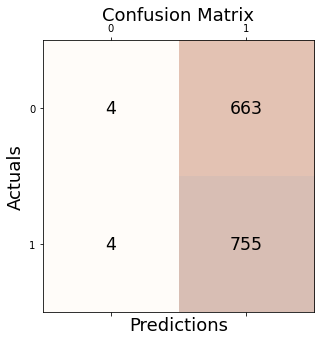

In [ ]:
from karateclub import GLEE
model = GLEE()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

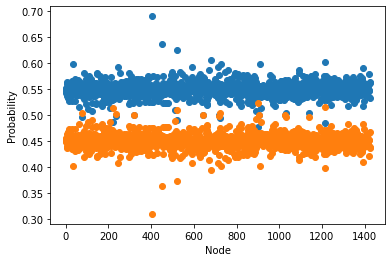

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

AUC: 0.5383
Precision: 0.532
Recall: 0.995
Accuracy: 0.532
F1 Score: 0.694


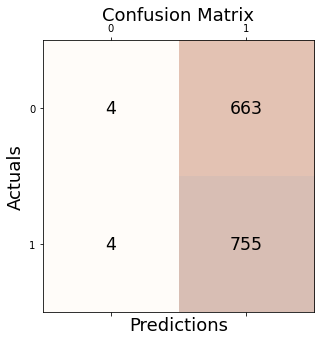

In [ ]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

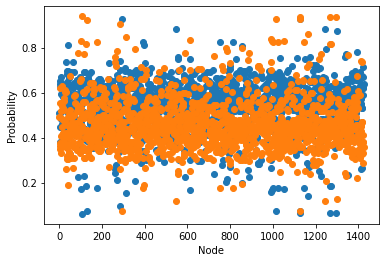

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

# Walklets

AUC: 0.5684
Precision: 0.586
Recall: 0.693
Accuracy: 0.576
F1 Score: 0.635


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


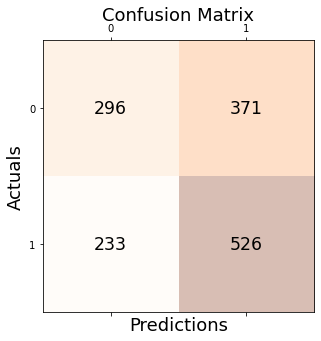

In [ ]:
from karateclub import Walklets
model = Walklets()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

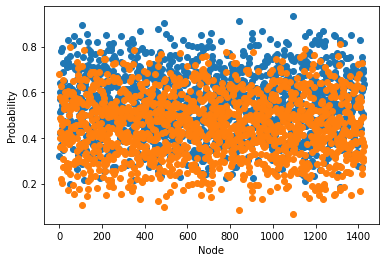

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

AUC: 0.5653
Precision: 0.586
Recall: 0.693
Accuracy: 0.576
F1 Score: 0.635


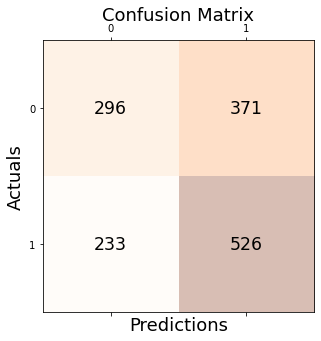

In [ ]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

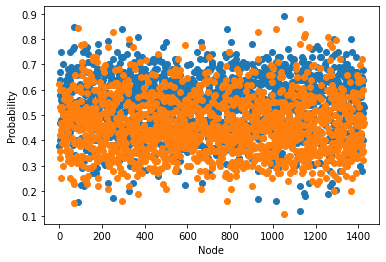

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

# GraRep

AUC: 0.5607
Precision: 0.579
Recall: 0.708
Accuracy: 0.570
F1 Score: 0.637


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


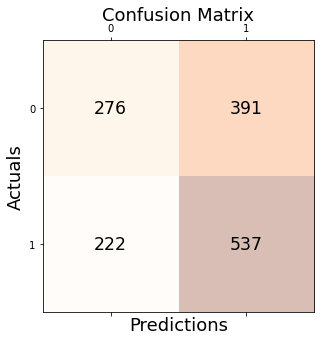

In [ ]:
from karateclub import GraRep
model = GraRep()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

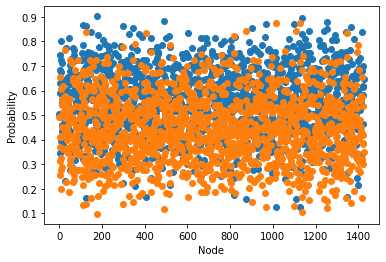

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

AUC: 0.5644
Precision: 0.579
Recall: 0.708
Accuracy: 0.570
F1 Score: 0.637


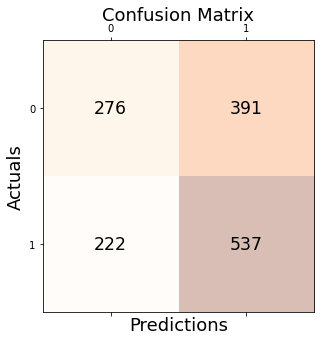

In [ ]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

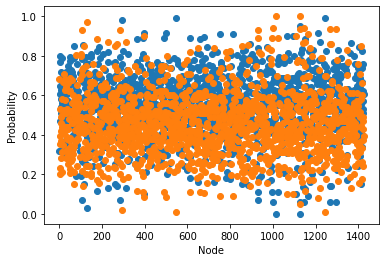

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

# DeepWalk

AUC: 0.5718
Precision: 0.589
Recall: 0.698
Accuracy: 0.580
F1 Score: 0.639


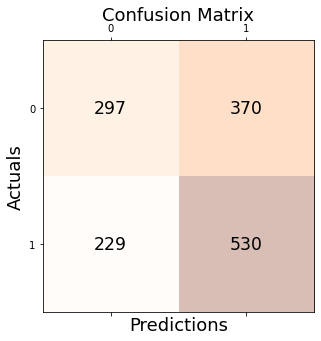

In [ ]:
from karateclub import DeepWalk
model = DeepWalk()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

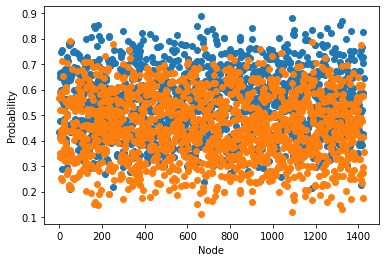

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

AUC: 0.5597
Precision: 0.589
Recall: 0.698
Accuracy: 0.580
F1 Score: 0.639


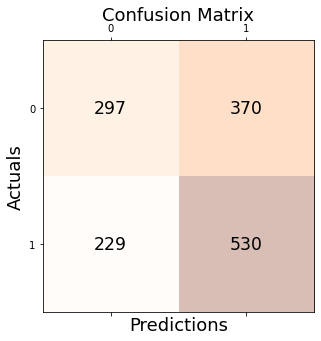

In [ ]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

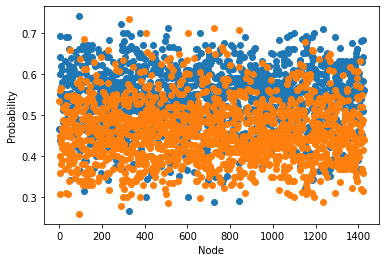

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")